# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

In [2]:
# importar librerías
import pandas as pd

In [120]:
# leer conjuntos de datos en los DataFrames
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

In [121]:
# mostrar información del DataFrame
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [122]:
# mostrar información del DataFrame
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [123]:
# mostrar información del DataFrame
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [124]:
# mostrar información del DataFrame
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [125]:
# mostrar información del DataFrame
order_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

<div class="alert alert-block alert-info">
<b>Comentarios:</br>

1. Realicé la carga de todos en su formato CSV creyendo que en verdad son archivos separado por coma, pero al ver la info() noté que el separado era un ";", así que se realiza el ajuste.
</br>
2. Se observan que los producto, pasillos y departamentos son catálogos y no tenemos valores nulos.
</br>
3. En `instacart_orders` si tenemos valores nulos para los días desde el pedido anterior, lo cual tiene mucho sentido ya que hay personas que solo han hecho una única vez un pedido.
</br>
4. Y con respecto a `order_products` no tenemos información sobre nulos ya que es tan grande que .info() no me dice dicho dato.
</b> <a class="tocSkip"></a>
</div>

# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [126]:
# Revisa si hay pedidos duplicados
print(orders.duplicated().sum())
# Cómo si hay duplicados vamos a imprimirlos y ver de qué se trata
print(orders[orders.duplicated()])

15
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48         

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Al imprimir los valores duplicados, se observa que todos tiene en común que se hicieron el miércoles a las 2am. En total son 15 registros que se duplican.
</b> <a class="tocSkip"></a>
</div>

In [127]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
orders_wend_2am = orders.query("order_dow==3 and order_hour_of_day==2")
print(orders_wend_2am)

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
4838     2766110   162084            41          3                  2   
5156     2190225   138285            18          3                  2   
15506     553049    58599            13          3                  2   
18420     382357   120200            19          3                  2   
24691     690242    77357             2          3                  2   
...          ...      ...           ...        ...                ...   
457013   3384021    14881             6          3                  2   
458816    910166   164782            18          3                  2   
459635   1680532   106435             6          3                  2   
468324    222962    54979            59          3                  2   
477526   2592344    46860            38          3                  2   

        days_since_prior_order  
4838                      16.0  
5156                      11.0  
15506                   

¿Qué sugiere este resultado?
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Son 15 duplicados de 121 con esas condiciones, que represetan el 12.4%, así que no es una cantidad que impacte en nuestra revisión, así que podemos eliminarlos.
</b> <a class="tocSkip"></a>
</div>

In [128]:
# Elimina los pedidos duplicados
orders = orders.drop_duplicates()
orders.reset_index(drop=True, inplace=True)

In [129]:
# Vuelve a verificar si hay filas duplicadas
print(orders.duplicated().sum())

0


In [130]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
print(orders['order_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Se localizaron valores duplciados, y al revisarlos, se observó que solo sucedieoron un miércoles a las 2am, al analizarlos y compararlos con todos los valores de miércoles a las 2am se observó que eran 15 duplicados de 121 con esas condiciones, que represetan el 1.2%, así que los eliminamos.
</b> <a class="tocSkip"></a>
</div>

### `products` data frame

In [131]:
# Verifica si hay filas totalmente duplicadas
print(products.duplicated().sum())

0


In [132]:
# Revisa únicamente si hay ID de productos duplicados
print(products['product_id'].duplicated().sum())

0


In [133]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products['product_name'] = products['product_name'].str.upper()
print(products['product_name'].duplicated().sum())


1361


In [134]:
# Revisa si hay nombres duplicados de productos no faltantes
print(products[products['product_name'].duplicated() & products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
436           437          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1257 rows x 4 columns]


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Se ponen en mayúsculas los nombres de los productos para tener mayor certeza al buscar duplicados.
Se localizaron valores duplicados en los nombres de los productos. Además, se observa que 1257 de estos valores duplicados es porque el valor de nombre es Nulo. esto representa el 92.3% de todos los duplicados así que puede ser opción eliminarlos, pero antes, será necesario revisar si estos de alguna forma han sido utilizado en alguna orden.
</b> <a class="tocSkip"></a>
</div>

### `departments` data frame

In [135]:
# Revisa si hay filas totalmente duplicadas
print(departments.duplicated().sum())

0


In [136]:
# Revisa únicamente si hay IDs duplicadas de departamentos
print(departments['department_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.


<div class="alert alert-block alert-info">
<b>Comentarios:</br>
No hay duplicidades ni a nivel de la tabla general, ni a nivel particular de el id de departament, así que no hay nada más que revisar al respecto.
</b> <a class="tocSkip"></a>
</div>

### `aisles` data frame

In [137]:
# Revisa si hay filas totalmente duplicadas
print(aisles.duplicated().sum())

0


In [138]:
# Revisa únicamente si hay IDs duplicadas de pasillos
print(aisles['aisle_id'].duplicated().sum())

0


Describe brevemente tus hallazgos y lo que hiciste con ellos.
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
No hay duplicidades ni a nivel de la tabla general, ni a nivel particular de el `aisle_id`, así que no hay nada más que revisar al respecto.
</b> <a class="tocSkip"></a>
</div>

### `order_products` data frame

In [139]:
# Revisa si hay filas totalmente duplicadas
print(order_products.duplicated().sum())

0


In [140]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print(order_products['order_id'].duplicated().sum())
print(order_products['product_id'].duplicated().sum())

4094961
4499434


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Esta tabla contiene el registro histórico de todas las transacciones, para cada `order_id`, deben de existir más de un product_id, asi que es natural ver tantos duplicados si los vemos por columnas, pero al ver duplicidades a nivel de tabla no hay,así que no hay nada que hacer al respecto.
</b> <a class="tocSkip"></a>
</div>

## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [141]:
# Encuentra los valores ausentes en la columna 'product_name'
print(products[products['product_name'].isna()])

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Los registro con produc_name ausente aparentan tener una característica similar.
</b> <a class="tocSkip"></a>
</div>

In [142]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products_nan = products[products['product_name'].isna()]
product_by_aisle = products_nan.groupby(by='aisle_id').count()
print(product_by_aisle)

          product_id  product_name  department_id
aisle_id                                         
100             1258             0           1258


Describe brevemente cuáles son tus hallazgos.
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Se observa que todos los nombre de productos ausentes pertencen al aisle_id=100.
</b> <a class="tocSkip"></a>
</div>

In [143]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products_nan = products[products['product_name'].isna()]
product_by_dept = products_nan.groupby(by='department_id').count()
print(product_by_dept)

               product_id  product_name  aisle_id
department_id                                    
21                   1258             0      1258


Describe brevemente cuáles son tus hallazgos.
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Se observa además, que todos los nombre de productos ausentes pertencen al department_id = 21.
</b> <a class="tocSkip"></a>
</div>

In [144]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
products_100_21 = products.query("department_id == 21 & aisle_id == 100 ")
print(products_100_21)

       product_id product_name  aisle_id  department_id
37             38          NaN       100             21
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1258 rows x 4 columns]


Describe brevemente cuáles son tus hallazgos.

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Se observa que todos los registros con department_id=21 y aisle_id=100 son los que tiene el nombre de producto ausente, así que dentro de todos los datos. solo esta conincidencia no tiene un nombre definido. así que podemos renombrarlo con la confianza que esto, solo va a alterar una misma característica dentro de los datos.
</b> <a class="tocSkip"></a>
</div>

In [145]:
# Completa los nombres de productos ausentes con 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown') 
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Todos los nombres de productos ausentese se cambiar por 'Unknown'.
</b> <a class="tocSkip"></a>
</div>

### `orders` data frame

In [146]:
# Encuentra los valores ausentes
print(orders[orders['days_since_prior_order'].isna()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
28        133707   182261             1          3                 10   
96        787445    25685             1          6                 18   
100       294410   111449             1          0                 19   
103      2869915   123958             1          4                 16   
104      2521921    42286             1          3                 18   
...          ...      ...           ...        ...                ...   
478880   2589657   205028             1          0                 16   
478881   2222353   141211             1          2                 13   
478907   2272807   204154             1          1                 15   
478911   2499542    68810             1          4                 19   
478930   1387033    22496             1          5                 14   

        days_since_prior_order  
28                         NaN  
96                         NaN  
100                     

In [147]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
print(orders[orders['order_id'].isna()])
print(orders[orders['user_id'].isna()])
print(orders[orders['order_number'].isna()])
print(orders[orders['order_dow'].isna()])
print(orders[orders['order_hour_of_day'].isna()])

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []
Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []


Describe brevemente tus hallazgos y lo que hiciste con ellos.

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Desde orders.info() era evidente que solo days_since_prior_order tenía valores ausentes mismo que son consistentes con la naturaleza de su existencia. Fuera de eso, no hay ningún dato ausente.
</b> <a class="tocSkip"></a>
</div>

### `order_products` data frame

In [148]:
# Encuentra los valores ausentes
print(order_products[order_products['order_id'].isna()])
print(order_products[order_products['product_id'].isna()])
print(order_products[order_products['add_to_cart_order'].isna()])
print(order_products[order_products['reordered'].isna()])

Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
Index: []
         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]
Empty DataFrame
Columns: [order_id, product_id, add_to_cart_order, reordered]
In

In [149]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("el valor máximo de la columna add_to_cart_order es:",order_products['add_to_cart_order'].max())
print("el valor mínimo de la columna add_to_cart_order es:",order_products['add_to_cart_order'].min())

el valor máximo de la columna add_to_cart_order es: 64.0
el valor mínimo de la columna add_to_cart_order es: 1.0


Describe brevemente cuáles son tus hallazgos.

In [150]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
print(order_products[order_products['add_to_cart_order'].isna()])

         order_id  product_id  add_to_cart_order  reordered
737       2449164        5068                NaN          0
9926      1968313       43867                NaN          0
14394     2926893       11688                NaN          0
16418     1717990        4142                NaN          0
30114     1959075       42828                NaN          1
...           ...         ...                ...        ...
4505662   1800005        7411                NaN          0
4511400   1633337         260                NaN          0
4517562    404157        9517                NaN          0
4534112   1673227       17835                NaN          0
4535739   1832957       17949                NaN          1

[836 rows x 4 columns]


In [151]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
orders_p_nan = order_products[order_products['add_to_cart_order'].isna()]
orders_p_nan_grouped = orders_p_nan.groupby(by='order_id')['product_id'].count()
print(orders_p_nan_grouped.sort_values())


order_id
9310        1
747668      1
1598369     1
1677118     1
2170451     1
           ..
1959075    34
171934     40
2136777    44
3308010    51
61355      63
Name: product_id, Length: 70, dtype: int64


Describe brevemente cuáles son tus hallazgos.
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Considerando solo los valores ausentes, se observa que la cantidad de productos solicitados en cada orden, NO exceden los 63 productos. Y la mínima cantidad de prodcutos solicitados es de uno. Además, estos son solo 70 órdenes (distintas) contra las 450,046 órdenes que NO tiene valores ausente.
</b> <a class="tocSkip"></a>
</div>

In [152]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999)
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].astype('int')
print(order_products.head())

   order_id  product_id  add_to_cart_order  reordered
0   2141543       11440                 17          0
1    567889        1560                  1          1
2   2261212       26683                  1          1
3    491251        8670                 35          1
4   2571142        1940                  5          1


Describe brevemente tus hallazgos y lo que hiciste con ellos.
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Se trabajan con los valores ausentes de la secuencia en la que se añade cada artículo. Se entiendo que ese valor, dentro de una misma orden, debe ser incrementa en +1 para tener el registro rpeciso de cómo el usuario fue seleccionando sus productos. 
Al no tener valores, y ver que si los agrupoamos por orden, la cantida está entre 1 y 63 (inclusive), podemos poner un valor muy alto (999), para que estos datos, que representan solo 70 órdenes (de 450K) se "alejen" de las gráficas y estadísticas que hagamos en lo sucesivo.
</b> <a class="tocSkip"></a>
</div>

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Revisamos los valores ausente y tomamos decición con base en los mismos datos, y así otorgarle un valor que no impacte en las conclusiones que haremos acontinuación.
</b> <a class="tocSkip"></a>
</div>

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [153]:
print(orders.groupby(by='order_hour_of_day')['order_id'].count())

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


In [154]:
print(orders.groupby(by='order_dow')['order_id'].count())

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


Escribe aquí tus conclusiones
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Usamos el group by sobre order_dow y order_hour_of_day para revisar todos los posibles valores de estos datos. Confirmando así que  `order_hour_of_day` oscila entre 0 y 23 y `order_dow` oscila entre 0 y 6
</b> <a class="tocSkip"></a>
</div>

### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes? 

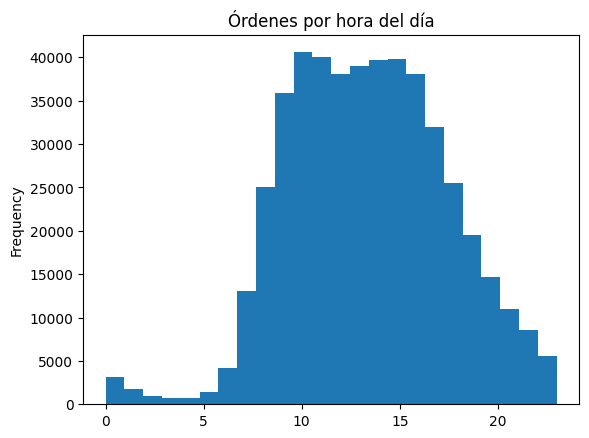

In [155]:
# A.2 Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
from matplotlib import pyplot as plt
orders['order_hour_of_day'].plot(title = 'Órdenes por hora del día',kind = 'hist', bins=24, ylabel='Frecuencia')
plt.show()

Escribe aquí tus conclusiones
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Se observa una tendencia clara que la gente realiza órdenes entre las 10am y 11am, y luego entre las 12 y 17 horas.
</b> <a class="tocSkip"></a>
</div>

### [A3] ¿Qué día de la semana compran víveres las personas?

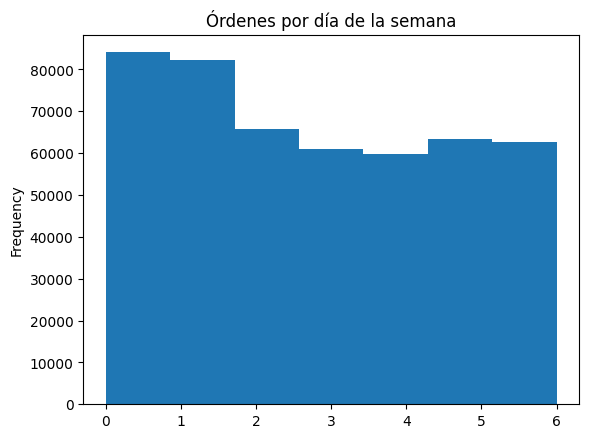

In [156]:
# A.3 Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
orders['order_dow'].plot(kind='hist', title = 'Órdenes por día de la semana', bins = 7, ylabel='Frecuencia')
plt.show()

Escribe aquí tus conclusiones
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
el domingo es el día en que la gente compra más víveres (yo hago eso cuando pido el súper en línea) y el lunes como el segundo mejor día para surtirse.
</b> <a class="tocSkip"></a>
</div>

### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

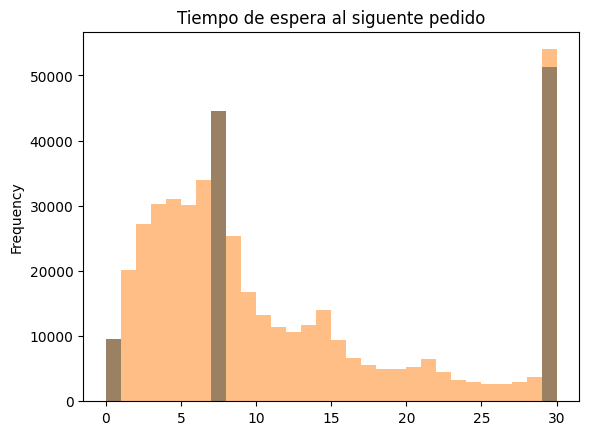

In [157]:
#A.4 Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

# Como se que los días de interes suceden en 0, 7 y 30, hago un DataFrame solo con esos valores para realizar un contraste con lo demás.
oders_interest = orders[orders['days_since_prior_order'].isin([0,7,30])]
oders_interest['days_since_prior_order'].plot(kind='hist',  ylabel='Frecuencia', bins=30 , alpha = 0.9)

# Historgrama de los días desde la última orden solicitada
orders['days_since_prior_order'].plot(kind='hist', title = 'Tiempo de espera al siguente pedido', ylabel='Frecuencia', bins=30, alpha = 0.5)
plt.show()

Escribe aquí tus conclusiones
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Es algo sorprendente que un gran número de personas realicen pedidos el mismo día. Lo más natural (que sí representan los datos), es que SIETE, sea el día de espera de mayor incidencia, esto va a corde con que la mayor cantidad de pedidos sea los domingos.
Por otro lado, tenemos un gran nicho de oportunidad con los que espera 30 días, es muchísima gente que puede se atraida a reducir un poco esos tiempos.
</div>

<div class="alert alert-block alert-warning">
<b>NOTA: Como se podrá observar, creé un DataFrame con solo los valore en 0,7 y 30 . Pero al realizar el histograma y contrastarlo con los valores originales se aprecia una diferencia en el 30. ¿Será tema de la gráfica? o ¿algo hice mal con mis datos?</b> <a class="tocSkip"></a>

</div>
    
</a>


# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [158]:
# Creamos el DT de los los miércoles agrupado por la hora del día y sus totales
orders_wednesday = orders[orders['order_dow']==3].groupby(by='order_hour_of_day')['order_hour_of_day'].count()
print(orders_wednesday.head())

order_hour_of_day
0    373
1    215
2    106
3    101
4    108
Name: order_hour_of_day, dtype: int64


In [159]:
# Creamos el DT de los los sábados agrupado por la hora del día y sus totales
orders_saturday = orders[orders['order_dow']==6].groupby(by='order_hour_of_day')['order_hour_of_day'].count()

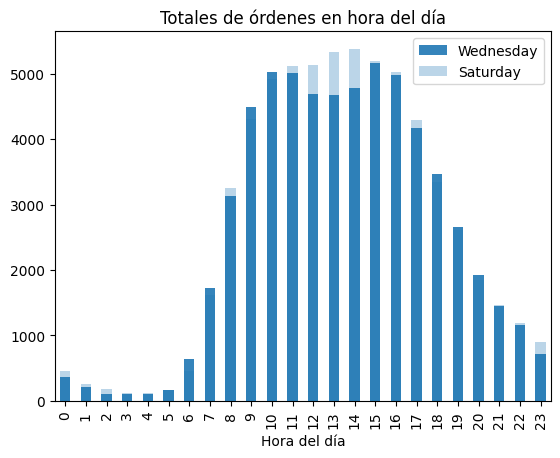

In [160]:
#hacemo el plot de miércoles
orders_wednesday.plot(title='Totales de órdenes en hora del día',kind='bar',x='order_hour_of_day', xlabel='Hora del día', alpha=0.9)
#hacemo el plot de sábado
orders_saturday.plot(title='Totales de órdenes en hora del día',kind='bar',x='order_hour_of_day', xlabel='Hora del día', alpha = 0.3)
plt.legend(['Wednesday','Saturday'])
plt.show()

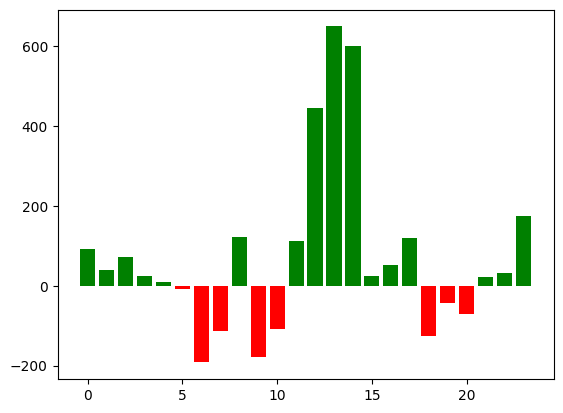

In [161]:
#Calculamos las diferencias de cada día.
difference = orders_saturday - orders_wednesday  # sábado menos miércoles
bars = plt.bar(difference.index, difference.values, color=['green' if val >= 0 else 'red' for val in difference.values])


Escribe aquí tus conclusiones
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Se observa una gran semejanza en los horarios de los pedidos del miércoles y el sábado. En casi todos los horarios, solo en las 12, 13 y 14 horas hay más pedidos los sábados.
</div>
    
</a>

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [162]:
#Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
#print(orders.groupby(by='user_id')['user_id'].count())
orders_per_client = orders.groupby(by='user_id')['user_id'].count()
# muetro los datos exactos
print(orders_per_client.value_counts().sort_index())


1     55357
2     36508
3     21547
4     13498
5      8777
6      6012
7      4240
8      3019
9      2152
10     1645
11     1308
12      947
13      703
14      512
15      437
16      263
17      184
18      121
19       85
20       52
21       22
22       23
23       19
24        3
25        1
26        1
28        1
Name: user_id, dtype: int64


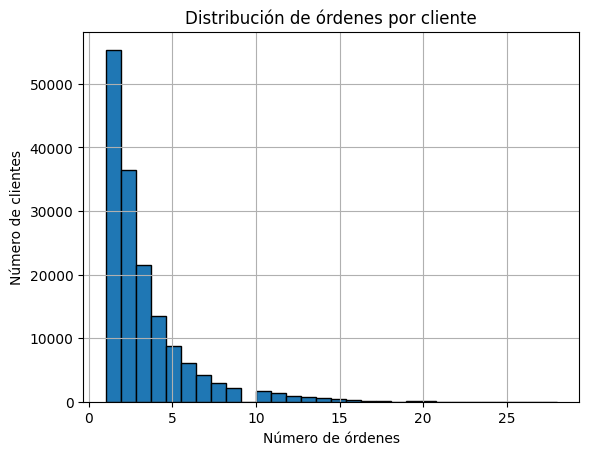

In [163]:

#REalizo el histograma
orders_per_client.plot(kind='hist', bins=30 , edgecolor='black')

plt.title('Distribución de órdenes por cliente')
plt.xlabel('Número de órdenes')
plt.ylabel('Número de clientes')
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
La máyoría de los clientes realizan una única orden y hasta cuatro veces.  Sin embargo, un grupo pequeño es muy fiel y ha realizado más de 10 pedidos, e incluso más de 20 pedidos.
</div>
    
</a>

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [164]:
# como vamos a necesitar el nombre, primero hacemos la unión de las tablas orders_product y product.

productos_completo = order_products.merge(products, on='product_id', how='inner')
#print(productos_completo.query('product_id in (1,2,3,4,5)').head(20))

In [165]:
#ahora ya podermo agrupar y order para mostrar el top 20.
frecuencia_productos = productos_completo.groupby(by=['product_id','product_name']).size()
frecuencia_productos = frecuencia_productos.sort_values(ascending=False)


In [166]:
# ahora ordernamos y mostramos el top 20
print(frecuencia_productos.head(20))
#imprimo solo el product Id 24852 para confirmar que hay 66,050 registros
#print(order_products[order_products['product_id'] == 24852])

product_id  product_name            
24852       BANANA                      66050
13176       BAG OF ORGANIC BANANAS      53297
21137       ORGANIC STRAWBERRIES        37039
21903       ORGANIC BABY SPINACH        33971
47209       ORGANIC HASS AVOCADO        29773
47766       ORGANIC AVOCADO             24689
47626       LARGE LEMON                 21495
16797       STRAWBERRIES                20018
26209       LIMES                       19690
27845       ORGANIC WHOLE MILK          19600
27966       ORGANIC RASPBERRIES         19197
22935       ORGANIC YELLOW ONION        15898
24964       ORGANIC GARLIC              15292
45007       ORGANIC ZUCCHINI            14584
39275       ORGANIC BLUEBERRIES         13879
49683       CUCUMBER KIRBY              13675
28204       ORGANIC FUJI APPLE          12544
5876        ORGANIC LEMON               12232
8277        APPLE HONEYCRISP ORGANIC    11993
40706       ORGANIC GRAPE TOMATOES      11781
dtype: int64


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Se observa que los productos más populares son los productos del tipo orgánico.  Aunque la banana es el más pedido.
</div>


<div class="alert alert-block alert-warning">
<b>NOTA: Al principio quise usar el productos_completo.groupby(by=['product_id','product_name']).count()

Que es lo que he estado usando, sin embargo, al querer ordenarlo me marcaba un error: sort_values() missing 1 required positional argument: 'by'

Investigué un poco y dice era porque el count, genera una columna de valores, pero no genera una columna de tipo dataframe. Y por eso al sugerencia era usar el size().

No entedí bien eso y espero que el resultado sí sea el correcto.</b> <a class="tocSkip"></a>

</div>


</a>

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [167]:
# Creamos el DT que tenga el total de producto por orden
product_in_order = order_products.groupby(by='order_id')['order_id'].count()

In [168]:
# muetro los datos exactos
print(product_in_order.value_counts().sort_index())

1      21847
2      26292
3      29046
4      31054
5      31923
       ...  
98         1
104        1
108        1
115        1
127        1
Name: order_id, Length: 90, dtype: int64


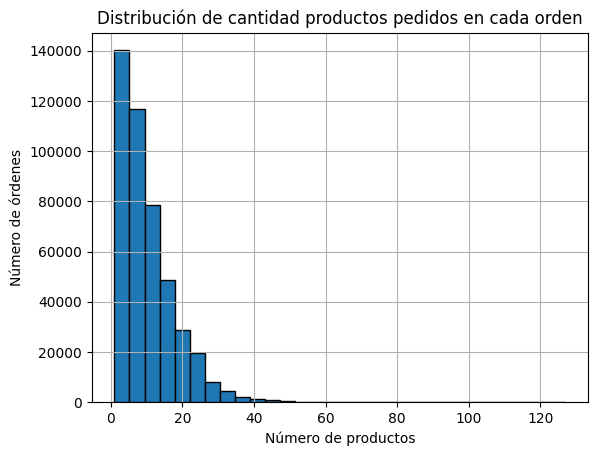

In [169]:

#Creamos la distribución
product_in_order.plot(kind='hist', bins=30 , edgecolor='black')

plt.title('Distribución de cantidad productos pedidos en cada orden')
plt.xlabel('Número de productos')
plt.ylabel('Número de órdenes')
plt.grid(True)
plt.show()

Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
¡Es mucha la cantida de veces que el pedido es de menos de 5 productos! La cantidad de veces con más de 20 productos decrece rápidamente aunque los datos dicen que al menos una vez, han habido pedidos de más de 100 productos! ¿habran sido dulces?
</div>



### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?

In [170]:
# no es lo mismo preguntarse por los "más pedidos", los "más frecuentemente pedidos". 
# La segunda refiere a que un mismo cliente haya pedido el mismo producto.
orders_product_complete = productos_completo.merge(orders, on='order_id', how='inner')

In [171]:
# Agrupamos por cliente y producto
user_and_products = orders_product_complete.groupby(by=['user_id','product_id','product_name'])['order_id'].nunique()
print(user_and_products.head())

user_id  product_id  product_name                                                    
2        9681        CHICKEN TIKKA MASALA WITH CUMIN INFUSED BASMATI RICE FROZEN MEAL    1
         12000       BAKED ORGANIC SEA SALT CRUNCHY PEA SNACK                            1
         13176       BAG OF ORGANIC BANANAS                                              1
         16589       PLANTAIN CHIPS                                                      1
         20574       ROASTED TURKEY                                                      1
Name: order_id, dtype: int64


In [172]:
# como nos interesan los que se han pedido más de una vez
user_and_products = user_and_products[user_and_products > 1]
print(user_and_products.head())
#Ahora, como ya tengo las veces que cada producto fue re-ordenado (vuelvo a pedir) por cad cliente, 
#con eso ya podemos contar cual de esto es el produto más re-ordenado

product_redorders_count = user_and_products.reset_index().groupby(by=['product_id','product_name'])['user_id'].count()

user_id  product_id  product_name                  
2        32792       CHIPOTLE BEEF & PORK REALSTICK    2
7        21137       ORGANIC STRAWBERRIES              2
13       4210        WHOLE MILK                        3
         27086       HALF & HALF                       3
         32446       BUNCHED CARROTS                   2
Name: order_id, dtype: int64


In [173]:
top_20_reordered = product_redorders_count.sort_values(ascending=False)
print(top_20_reordered.head(20))

product_id  product_name            
24852       BANANA                      14422
13176       BAG OF ORGANIC BANANAS      11612
21137       ORGANIC STRAWBERRIES         7885
21903       ORGANIC BABY SPINACH         7153
47209       ORGANIC HASS AVOCADO         6361
47766       ORGANIC AVOCADO              5063
27845       ORGANIC WHOLE MILK           4212
47626       LARGE LEMON                  4021
27966       ORGANIC RASPBERRIES          3947
16797       STRAWBERRIES                 3736
26209       LIMES                        3588
22935       ORGANIC YELLOW ONION         2996
24964       ORGANIC GARLIC               2779
45007       ORGANIC ZUCCHINI             2701
49683       CUCUMBER KIRBY               2514
8277        APPLE HONEYCRISP ORGANIC     2388
28204       ORGANIC FUJI APPLE           2369
39275       ORGANIC BLUEBERRIES          2290
5876        ORGANIC LEMON                2262
49235       ORGANIC HALF & HALF          2233
Name: user_id, dtype: int64


Escribe aquí tus conclusiones

<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Estadísticamente era esperado que la BANANA ,demás de ser las más pedida, también sea la que más veces fue re-ordenada por un mismo cliente.
en genral, casi todo tiene el patrón pero acá, el del lugar 20, ORGANIC HALF & HALF, no es parte del top 20 de más pedidos.
</div>

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [174]:
#Ahora vamos a usar el valor de "reordered". Dentro del conjunto de order_productos, si sumamos el valor
# de reordered tendremos las veces que el prodcuto fue vuelto a pedir. y si contamos ese camto, tendremos las veces que
# el producto fue pedido.

#primero agrupamos por prodcuto
order_by_product = order_products.groupby(by='product_id')

In [175]:
# como quieremos contar t sumas a la vez usamos agg()
# aplicamos eso la agrupación
order_by_product_agg = order_by_product.agg(
    total_orders = ( 'reordered','count'),
    total_re_ordered = ( 'reordered','sum'))
print(order_by_product_agg.head())

            total_orders  total_re_ordered
product_id                                
1                    280               158
2                     11                 0
3                     42                31
4                     49                25
7                      2                 1


            total_orders  total_re_ordered  proporcion_re_ordered
product_id                                                       
1                    280               158               0.564286
2                     11                 0               0.000000
3                     42                31               0.738095
4                     49                25               0.510204
7                      2                 1               0.500000


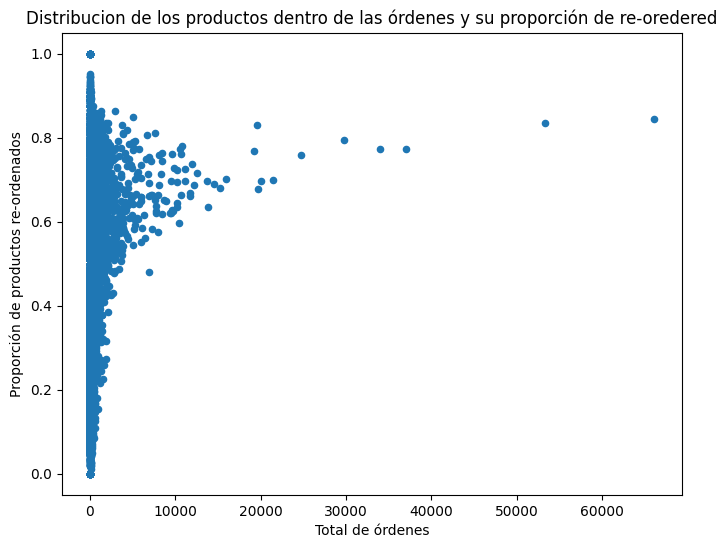

In [176]:
order_by_product_agg['proporcion_re_ordered'] =order_by_product_agg['total_re_ordered']/order_by_product_agg['total_orders']
print(order_by_product_agg.head())

top_order_by_product_agg = order_by_product_agg.sort_values('proporcion_re_ordered', ascending=False)

top_order_by_product_agg.plot(title='Distribucion de los productos dentro de las órdenes y su proporción de re-oredered'
                              ,x='total_orders'
                              ,y='proporcion_re_ordered'
                              , kind='scatter'
                              ,figsize=(8,6)
                              ,xlabel='Total de órdenes'
                             ,ylabel='Proporción de productos re-ordenados')
plt.show()

Escribe aquí tus conclusiones
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Todo indica que la BANANA vuelve a hacer aparición, ya que hay poco productos que son muy pedidos, y a la vez muy re-ordeneados. Son prodcutos muy populares y al parecer de alta necesidad.

Dejando esos de lado, tenemos unos podructos no tan populaes(menos de 10,000 ordnes), pero que son constatemente re-ordenados, en el 60% y 80% , indicando alfata fidelidad de los clientes a esto.

</div>

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [177]:
# La estrategía es similar a la anterior, pero ahora nos itneresa en el global de clientes,
# para eso vamos a suar la tabla más general que tenemos "orders_product_complete"
orders_product_complete_client = orders_product_complete.groupby(by='user_id')
# como quieremos contar t sumas a la vez usamos agg()
# aplicamos eso la agrupación
orders_product_complete_client_agg = orders_product_complete_client.agg(
    total_user_id = ( 'reordered','count'),
    total_re_ordered = ( 'reordered','sum'))
print(orders_product_complete_client_agg.head())

         total_user_id  total_re_ordered
user_id                                 
2                   26                 1
4                    2                 0
5                   12                 8
6                    4                 0
7                   14                13


            total_orders  total_re_ordered  proporcion_re_ordered
product_id                                                       
1                    280               158               0.564286
2                     11                 0               0.000000
3                     42                31               0.738095
4                     49                25               0.510204
7                      2                 1               0.500000


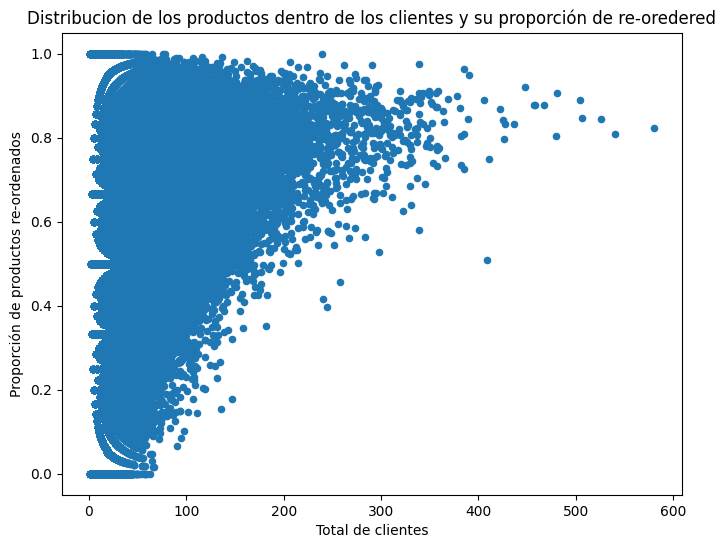

In [178]:
orders_product_complete_client_agg['proporcion_re_ordered'] =orders_product_complete_client_agg['total_re_ordered']/orders_product_complete_client_agg['total_user_id']
print(order_by_product_agg.head())

top_orders_product_complete_client_agg = orders_product_complete_client_agg.sort_values('proporcion_re_ordered', ascending=False)

top_orders_product_complete_client_agg.plot(title='Distribucion de los productos dentro de los clientes y su proporción de re-oredered'
                              ,x='total_user_id'
                              ,y='proporcion_re_ordered'
                              , kind='scatter'
                              ,figsize=(8,6)
                              ,xlabel='Total de clientes'
                             ,ylabel='Proporción de productos re-ordenados')
plt.show()

Escribe aquí tus conclusiones
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Tenemos muchos cliente con alta fidelidad a los productos, una media se hubica en un 80% de dicha proporción. 
</div>

### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [179]:
# Para logar ver esto, por a supioner que sol tomo todos los datoa de "productos_completo"
# y filtro solo por add_to_cart_order == 1. Si logro al menos 20 diferetnes productos, entonces tendré la repsuesta

productos_completo_first = productos_completo[productos_completo['add_to_cart_order'] == 1]
print(productos_completo_first['product_name'].nunique())

26469


In [180]:
productos_completo_first_group = productos_completo_first.groupby(by=['product_id','product_name'])['order_id'].count()

In [181]:
productos_completo_first_group.reset_index().sort_values(by='order_id', ascending=False).head(20)

,product_id,product_name,order_id
13414,24852,BANANA,15562
7127,13176,BAG OF ORGANIC BANANAS,11026
15028,27845,ORGANIC WHOLE MILK,4363
11384,21137,ORGANIC STRAWBERRIES,3946
25439,47209,ORGANIC HASS AVOCADO,3390
11786,21903,ORGANIC BABY SPINACH,3336
25732,47766,ORGANIC AVOCADO,3044
10622,19660,SPRING WATER,2336
9050,16797,STRAWBERRIES,2308
15102,27966,ORGANIC RASPBERRIES,2024


Escribe aquí tus conclusiones
<div class="alert alert-block alert-info">
<b>Comentarios:</br>
Y la BANANA hast el final.
Acá, no cinderé necesario hace un analicies por cada cliente y ver las veces que pidió en el primeor orden el mismo artículo. Acá, lo que hice fue revisar de forma global, los artículos que se pidieron primero en el orden secuencial. Y sobre eso trabaje.

Los productos orgánicos siguen siendo parte del top, pero ahora aparecen los HASS AVOCADOS.
</div>

### Conclusion general del proyecto:


<div class="alert alert-block alert-info">

Me gustó mucho el proyecto.

Me gustó el paso a paso y la forma en al que se debe de comenzar a analizar al información dada.
Me gustó que las gráficas le den sentido a las preguntas planteadas.

Creo que usé de forma excesiva el 'groupby' y el 'Count'.

En los group by de productos use estte ['product_id','product_name'] porque como me pedían el Id y nombre, al hacer eso tendría los dos de una vez. 
Otra forma sería solo trabara por order_products y al final hacer el merge con products,pero como vi que eso lo iba a usar muchas veces, opté por la primer forma.

las preguntas C3 y C4 no las entendí a profundidad. Creo que hacer las propociones, me costó asimilar y digerir el 'sobre qué lo tengo que hacer'.
Las gráficas del C4 no me convecnió del todo, así que tal vez me haya equivocado ahí.
</div>